In [1]:
import machine_learning_data as mld
import machine_learning_plotting as mlp
import machine_learning_training as mlt
import machine_learning_dataloading as mldl

import importlib
importlib.reload(mlp)
importlib.reload(mld)
importlib.reload(mlt)
importlib.reload(mldl)


<module 'machine_learning_dataloading' from 'c:\\Users\\eeg\\Documents\\ZZ_Olav_Cornelius_Data\\ZZPython\\AI_Coding\\machine_learning_stock_prediction\\machine_learning_dataloading.py'>

# Create data folder

In [4]:
mld.generate_financial_data()

ModuleNotFoundError: No module named 'download_csv'

# Visualise temporal evolution

In [14]:
tensor_data, loaded_data = mldl.create_tensor_from_csvs(['data/financial_data.csv', 
                                                       'data/gdp_data.csv', 
                                                       'data/interest_rate_data.csv',
                                                       'data/inflation_data.csv',
                                                       'data/unemployment_rate_data.csv'])

Loaded data/financial_data.csv with columns: ['date', 'Open', 'High', 'Low', 'Close', 'Volume']
Loaded data/gdp_data.csv with columns: ['date', 'gdp']
Loaded data/interest_rate_data.csv with columns: ['date', 'interest_rate']
Loaded data/inflation_data.csv with columns: ['date', 'inflation']
Loaded data/unemployment_rate_data.csv with columns: ['date', 'unemployment_rate']
After extending monthly data: (1995, 10)
After handling NaN values: (1995, 10)
Created tensor with shape: torch.Size([1995, 9])
        date         Open         High          Low        Close  \
0 2020-01-01  3244.669922  3258.139893  3235.530029  3257.850098   
1 2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098   
2 2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098   
3 2020-01-04  3223.423421  3246.379964  3219.773356  3238.660075   
4 2020-01-05  3220.486735  3246.610026  3217.206624  3242.470052   

         Volume        gdp  interest_rate  inflation  unemployment_rate  
0  3.459930e+

Generating financial data plots from tensor data...


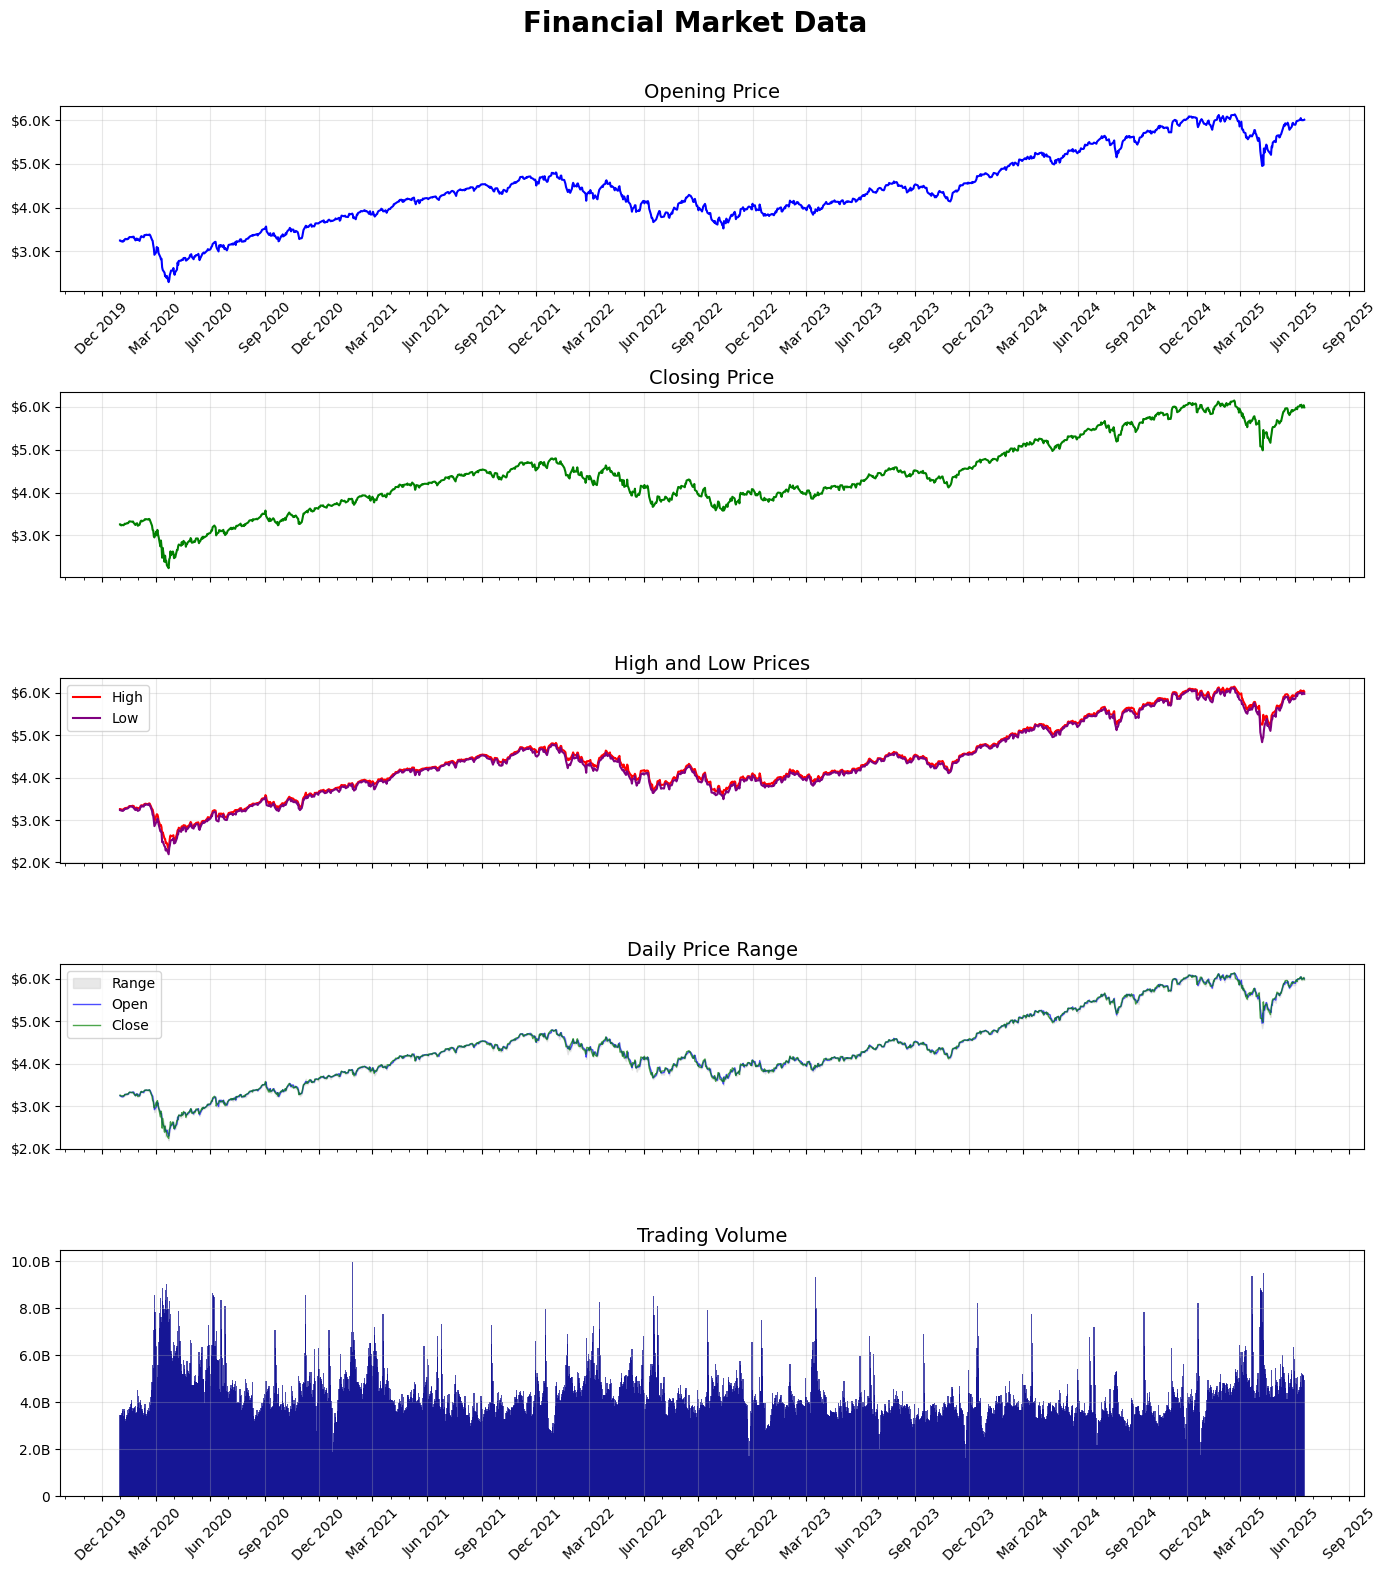

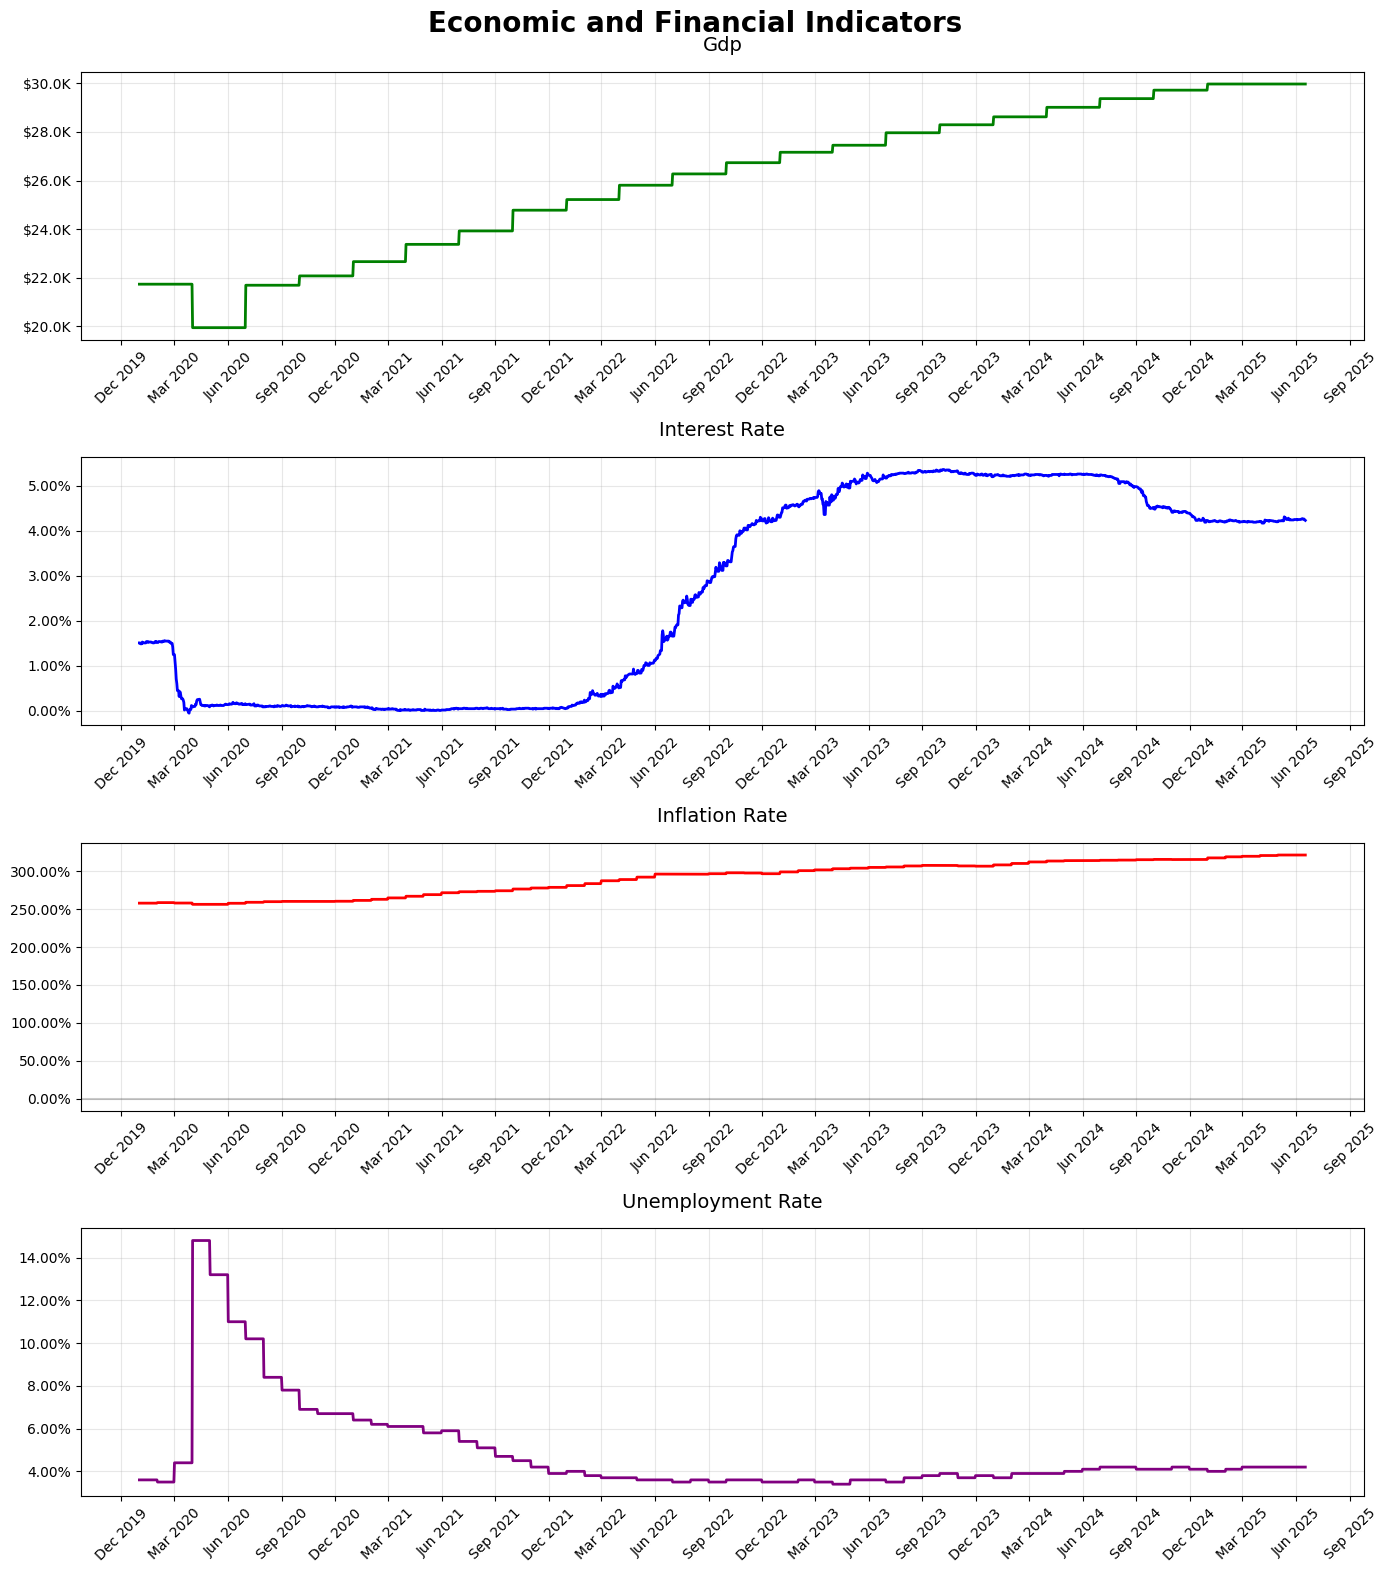

Financial data plots generated successfully


In [19]:
mlp.plot_financial_data_from_tensor(loaded_data, plot=True)

# Correlate different quantities


Creating focused correlation plot for Volume, Close price and economic indicators...
Selected 6 variables for focused correlation analysis
Using 1995 complete rows for correlation analysis


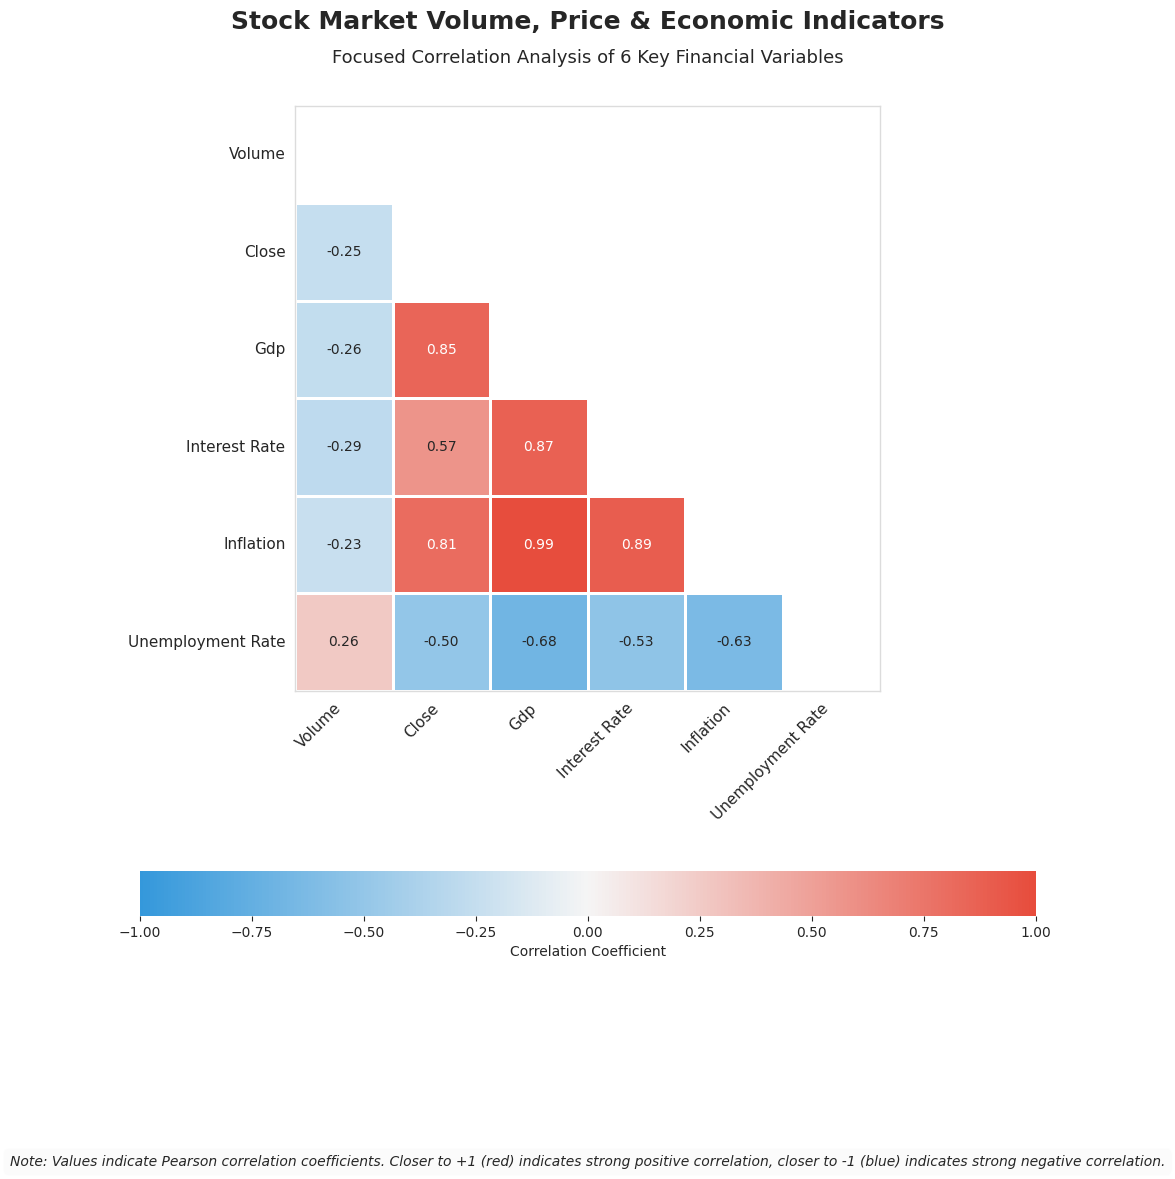

In [20]:
corr_matrix, found_vars, corr_df = mlp.create_half_correlation_plot3(loaded_data, plot = True, save= False)

# LSTM-RNN

In [18]:
# Add this cell to check your data structure
print("Keys in loaded_data:", loaded_data.keys())
print("Type of loaded_data:", type(loaded_data))

Keys in loaded_data: Index(['date', 'Open', 'High', 'Low', 'Close', 'Volume', 'gdp',
       'interest_rate', 'inflation', 'unemployment_rate'],
      dtype='object')
Type of loaded_data: <class 'pandas.core.frame.DataFrame'>


Using device: cuda
Processing tensor data from create_tensor_from_csvs...
Automatically detected loaded_data from caller's namespace
Target column: Open
Adding financial features...
Using 28 features for prediction
Training on 1383 samples, predicting 593

Starting parallel processing with 4 workers...


  1%|          | 3/592 [00:04<12:16,  1.25s/it]

Window 0/592: Final loss 0.0010


  4%|▍         | 26/592 [00:21<05:40,  1.66it/s]

Window 25/592: Final loss 0.0007


  9%|▊         | 51/592 [00:39<06:48,  1.32it/s]

Window 50/592: Final loss 0.0014


 13%|█▎        | 76/592 [00:57<05:39,  1.52it/s]

Window 75/592: Final loss 0.0014


 17%|█▋        | 101/592 [01:17<05:39,  1.45it/s]

Window 100/592: Final loss 0.0008


 21%|██▏       | 126/592 [01:37<06:48,  1.14it/s]

Window 125/592: Final loss 0.0012


 26%|██▌       | 151/592 [01:56<06:02,  1.22it/s]

Window 150/592: Final loss 0.0009


 30%|██▉       | 177/592 [02:17<04:38,  1.49it/s]

Window 175/592: Final loss 0.0012


 34%|███▍      | 203/592 [02:38<04:20,  1.49it/s]

Window 200/592: Final loss 0.0015


 38%|███▊      | 226/592 [02:57<03:59,  1.53it/s]

Window 225/592: Final loss 0.0014


 42%|████▏     | 251/592 [03:19<05:05,  1.12it/s]

Window 250/592: Final loss 0.0010


 47%|████▋     | 276/592 [03:39<03:35,  1.47it/s]

Window 275/592: Final loss 0.0011


 51%|█████     | 301/592 [04:01<03:21,  1.44it/s]

Window 300/592: Final loss 0.0013


 55%|█████▌    | 326/592 [04:24<03:45,  1.18it/s]

Window 325/592: Final loss 0.0011


 59%|█████▉    | 351/592 [04:46<04:02,  1.01s/it]

Window 350/592: Final loss 0.0010


 64%|██████▎   | 376/592 [05:08<02:49,  1.28it/s]

Window 375/592: Final loss 0.0009


 68%|██████▊   | 403/592 [05:33<02:19,  1.36it/s]

Window 400/592: Final loss 0.0015


 72%|███████▏  | 426/592 [05:56<02:34,  1.07it/s]

Window 425/592: Final loss 0.0013


 76%|███████▌  | 451/592 [06:21<02:26,  1.04s/it]

Window 450/592: Final loss 0.0014


 80%|████████  | 475/592 [06:46<02:19,  1.19s/it]

Window 475/592: Final loss 0.0015


 85%|████████▍ | 501/592 [07:12<01:18,  1.16it/s]

Window 500/592: Final loss 0.0011


 89%|████████▉ | 526/592 [07:38<01:22,  1.25s/it]

Window 525/592: Final loss 0.0016


 93%|█████████▎| 551/592 [08:02<00:35,  1.15it/s]

Window 550/592: Final loss 0.0021


 97%|█████████▋| 576/592 [08:27<00:14,  1.07it/s]

Window 575/592: Final loss 0.0019


100%|██████████| 592/592 [08:43<00:00,  1.13it/s]


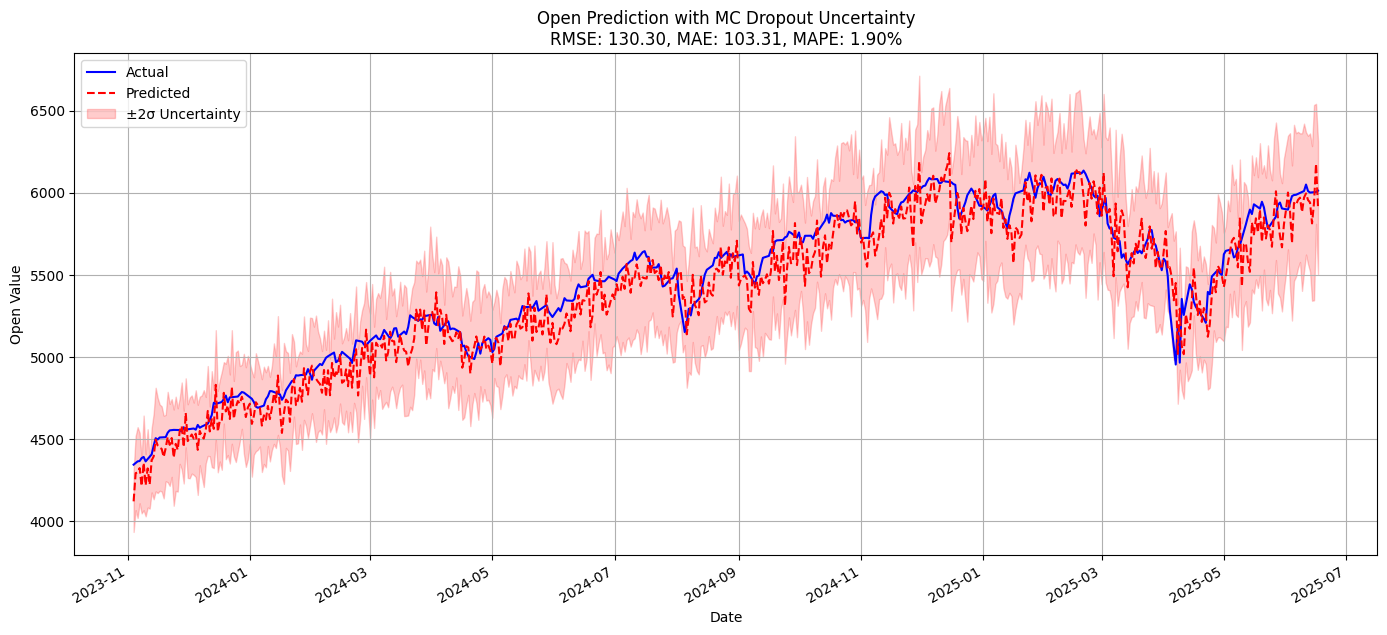

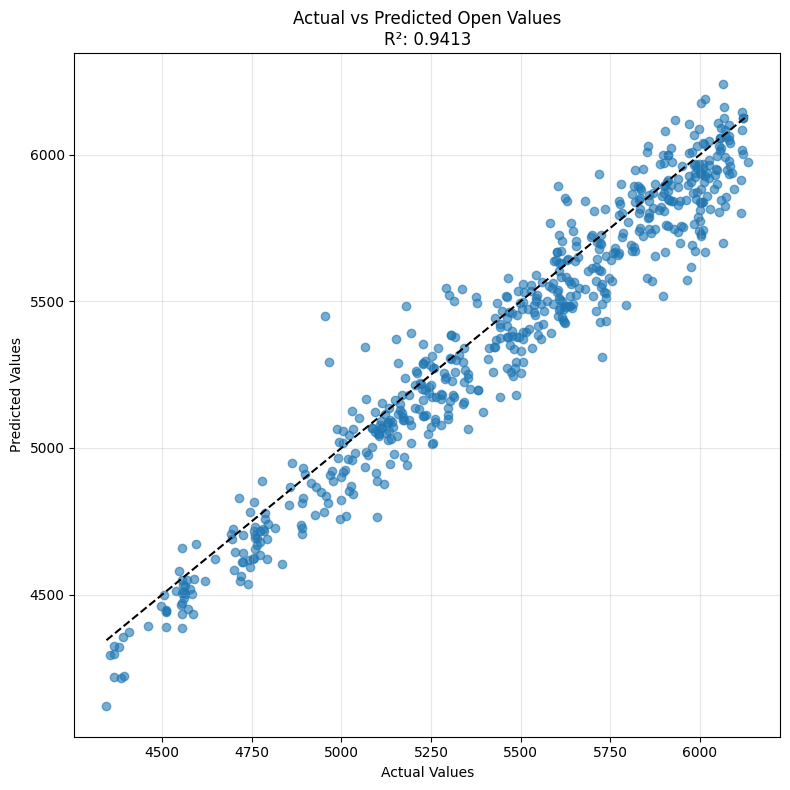

Parallel Processing Completed in 523.63 seconds
Prediction Results:
RMSE: 130.2986
MAE: 103.3141
MAPE: 1.90%
Correlation: 0.9702
Results saved to parallel_mc_results_Open.csv


In [11]:
import importlib
import machine_learning_training as mlt
importlib.reload(mld)  # Force reload the module to get the latest changes

# Then run the prediction again
dates, predictions, actuals, std_devs = mlt.parallelized_rolling_window_prediction_for_financial_data2(
    tensor_data,
    target_variable='Open',
    sequence_length=15,
    epochs=20,
    hidden_dim=128,
    num_layers=3,
    batch_size=32,
    mc_samples=30,
    use_features=True
)